### DIVE INTO DEEP LEARNING

##### 张量基本操作与属性

In [1]:
import torch

In [7]:
x=torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [8]:
x.shape#形状

torch.Size([12])

In [9]:
x.numel()#元素总数

12

In [10]:
X=x.reshape(2,6)#元素不变,可以用-1自动调整
X

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

In [11]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [12]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [13]:
torch.randn(3,4)#服从标准正态分布的随机

tensor([[ 0.2366,  1.6915,  0.1457,  0.4248],
        [-0.6571,  1.1393, -0.4302, -0.2171],
        [-0.4048,  0.0119, -1.1268,  0.1938]])

In [14]:
torch.tensor([[2,1,3,4],[1,2,4,3],[4,3,1,2]])

tensor([[2, 1, 3, 4],
        [1, 2, 4, 3],
        [4, 3, 1, 2]])

##### 运算符

In [15]:
x=torch.tensor([1.0,2,4,8])
y=torch.tensor([2,2,2,2])
x+y,x-y,x*y,x/y,x**y#**为求幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [16]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [17]:
X=torch.arange(12,dtype=torch.float32).reshape((3,-1))
Y=torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
torch.cat((X,Y),dim=0),torch.cat((X,Y),dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [18]:
X==Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [19]:
X.sum()

tensor(66.)

##### 广播机制

In [20]:
a=torch.arange(3).reshape((3,-1))
b=torch.arange(2).reshape((-1,2))
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [21]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

##### 索引和切片

In [22]:
X[-1],X[1:3]#-1是最后的元素

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [23]:
X[1,2]=9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [24]:
X[0:2,:]=11
X

tensor([[11., 11., 11., 11.],
        [11., 11., 11., 11.],
        [ 8.,  9., 10., 11.]])

##### 节省内存

In [25]:
before=id(Y)#获取Y所在地址
Y=Y+X
id(Y)==before
#很多时候我们应该原地进行更新

False

In [26]:
Z=torch.zeros_like(Y)
print('id(Z):',id(Z))
Z[:]=X+Y
print('-----------------------')
print('id(Z)',id(Z))

id(Z): 2637245130288
-----------------------
id(Z) 2637245130288


In [27]:
before=id(X)
X+=Y
id(X)==before

True

##### 转换为其他Python对象

In [28]:
A=X.numpy()
B=torch.tensor(A)
type(A),type(B)

(numpy.ndarray, torch.Tensor)

In [29]:
a=torch.tensor([3.5])
a,a.item(),float(a),int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

##### 2.1experiment

In [30]:
S=torch.arange(6).reshape(-1,1)
M=torch.arange(6).reshape(1,-1)
S,M

(tensor([[0],
         [1],
         [2],
         [3],
         [4],
         [5]]),
 tensor([[0, 1, 2, 3, 4, 5]]))

In [31]:
S+M

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 1,  2,  3,  4,  5,  6],
        [ 2,  3,  4,  5,  6,  7],
        [ 3,  4,  5,  6,  7,  8],
        [ 4,  5,  6,  7,  8,  9],
        [ 5,  6,  7,  8,  9, 10]])

##### 读取数据集

In [32]:
import os
os.makedirs(os.path.join('..','data'),exist_ok=True)
data_file=os.path.join('..','data','house_tiny.csv')
with open(data_file,'w') as f:
    f.write('NumRooms,Alley,Price\n')#列名
    f.write('NA,Pave,127500\n')#每行一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [33]:
#!pip install pandas
import pandas as pd


In [34]:
data=pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


##### 处理缺失值

In [35]:
inputs,outputs=data.iloc[:,0:2],data.iloc[:,2]#iloc索引 
numeric_cols = inputs.select_dtypes(include=['number']).columns
inputs[numeric_cols] = inputs[numeric_cols].fillna(inputs[numeric_cols].mean())
string_cols = inputs.select_dtypes(include=['object']).columns
for col in string_cols:
    mode = inputs[col].mode()[0]  # 获取众数
    inputs[col] = inputs[col].fillna(mode)
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0  Pave
2       4.0  Pave
3       3.0  Pave


In [36]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0        True      False
1       2.0        True      False
2       4.0        True      False
3       3.0        True      False


##### 转换为张量形式

In [37]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3., 1., 0.],
         [2., 1., 0.],
         [4., 1., 0.],
         [3., 1., 0.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

##### 自动微分

In [38]:
x=torch.arange(4.0,requires_grad=True)
x.grad

In [39]:
y=2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [40]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [41]:
x.grad==4*x

tensor([True, True, True, True])

In [42]:
x.grad.zero_()
y=x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [43]:
x.grad.zero_()
y=x*x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

##### 概率

In [2]:
import sys
!{sys.executable} -m pip install --force-reinstall --no-cache-dir matplotlib


Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
     - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
     - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
     - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
     -- ------------------------------------- 0.5/8.1 MB 465.6 kB/s eta 0:00:17
     ----- ---------------------------------- 1.0/8.1 MB 967.3 kB/s eta 0:00:08
     ------- -------------------------------- 1.6/8.1 MB 1.2 MB/s eta 0:00:06
     ------------ --------------------------- 2.6/8.1 MB 1.8 MB/s eta 0:00:04
     ---------------- ----------------------- 3.4/8.1 MB 2.1 MB/s eta 0:00:03
     -------------------- ------------------- 4.2/8.1 MB 2.3 MB/s eta 0:00:02
     ------------------------- -------------- 5.2/8.1 MB 2.6 MB/s eta 0:00:02
     --------------------------------- ------ 6.8/8.1 MB 3.0 MB/s eta 0:00:01
     -----------------------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d2l 1.0.3 requires matplotlib==3.7.2, but you have matplotlib 3.10.7 which is incompatible.
d2l 1.0.3 requires numpy==1.23.5, but you have numpy 2.3.4 which is incompatible.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.3.4 which is incompatible.


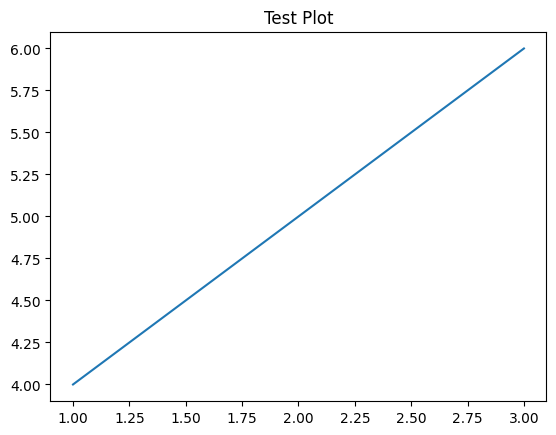

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Test Plot")
plt.show()


In [2]:
import torchvision
print(torchvision.__version__)


0.20.1


In [1]:
import pandas as pd
print(pd.__version__)


2.3.3


In [3]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 0., 1.])